**Pr√©traitement des donn√©es**
---

**1. Importation des Biblioth√®ques**

In [1]:
pip install tensorflow

In [2]:
!pip install mtranslate

  Preparing metadata (setup.py) ... done
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3673 sha256=cd3b73c83f47acca2009b75cea1faa071b87e5e5ef1ad28d42f41afa401f14fc
  Stored in directory: /root/.cache/pip/wheels/38/00/7c/b947c5efaf4ddcf011a91b1566f80851ea560351fd81d029ef
Successfully built mtranslate


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

**2. Chargement du Dataset**

In [4]:
df1 = pd.read_csv("Blood_samples_dataset_balanced.csv")
df2 = pd.read_csv("blood_samples_dataset_test.csv")

**3. Exploration des Donn√©es**

In [5]:
# V√©rification des colonnes
print("Colonnes du premier dataset :", df1.columns)
print("Colonnes du deuxi√®me dataset :", df2.columns)

Colonnes du premier dataset : Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')
Colonnes du deuxi√®me dataset : Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', '

In [6]:
# V√©rification du nombre de lignes et de colonnes
print("\nTaille du premier dataset :", df1.shape)
print("Taille du deuxi√®me dataset :", df2.shape)


Taille du premier dataset : (2351, 25)
Taille du deuxi√®me dataset : (486, 25)


In [7]:
# Affichage d'un aper√ßu des premi√®res lignes
print("\nAper√ßu du premier dataset : df1.head()")
df1.head()


Aper√ßu du premier dataset : df1.head()


Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505562   
2                     0.868369                                   0.026808   
3                     0.125447                                   0.501051   
4                     0.257288                                   0.805987   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.502665         0.215560         0.512941  0.064187  0.610827   
1  ...  0.856810         0.652465         0.106961  0.942549  0.344261   
2  ...  0.466795         0.387332         0.421763  0.007186  0.506918   
3  ...  0.016256         0.040137         0.826721  0.265415  0.594148   
4  ...  0.429431         0.146294         0.221574  0.015280  0.567115   

   Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  
0    0.939485    0.095512  0.465957            0.769230   Healthy  
1    0.666368    0.659060  0.816982            0.401166  Diabetes  
2    0.431704    0.417295  0.799074            0.779208  Thalasse  
3    0.225756    0.490349  0.637061            0.354094    Anemia  
4    0.841412    0.153350  0.794008            0.094970  Thalasse  

[5 rows x 25 columns]

In [8]:
print("\nAper√ßu du deuxi√®me dataset :")
df2.head()


Aper√ßu du deuxi√®me dataset :


Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184890   
2                     0.500342                                   0.531829   
3                     0.785448                                   0.491495   
4                     0.621048                                   0.191756   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.653230         0.186104         0.430398  0.016678  0.885352   
1  ...  0.833540         0.153001         0.458533  0.401845  0.635969   
2  ...  0.678901         0.220479         0.817151  0.690981  0.101633   
3  ...  0.381500         0.459396         0.420154  0.798537  0.399236   
4  ...  0.993381         0.272338         0.663579  0.265227  0.918847   

   Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  
0    0.652733    0.788235  0.054788            0.031313  Thalasse  
1    0.574425    0.047025  0.607985            0.594123  Diabetes  
2    0.855740    0.551124  0.413294            0.070909  Heart Di  
3    0.324600    0.499504  0.436662            0.242766  Diabetes  
4    0.804910    0.571119  0.188368            0.750848  Heart Di  

[5 rows x 25 columns]

In [9]:
print("Maladies dans le dataset d'entra√Ænement :", df1["Disease"].unique())
print("Maladies dans le dataset de test :", df2["Disease"].unique())

Maladies dans le dataset d'entra√Ænement : ['Healthy' 'Diabetes' 'Thalasse' 'Anemia' 'Thromboc']
Maladies dans le dataset de test : ['Thalasse' 'Diabetes' 'Heart Di' 'Anemia' 'Thromboc' 'Healthy']


In [10]:
count_heart_di = df2[df2["Disease"] == "Heart Di"].shape[0]

# Afficher le r√©sultat
print(f"Nombre de lignes contenant 'Heart Di' : {count_heart_di}")

Nombre de lignes contenant 'Heart Di' : 39


**Cancat√©nation des deux Dataset**

In [11]:
df_novahealth = pd.concat([df1, df2], ignore_index=True)

# V√©rifier la nouvelle taille
print("Taille du dataset combin√© :", df_novahealth.shape)

# Sauvegarder le dataset fusionn√©
df_novahealth.to_csv("dataset_nova.csv", index=False)
print("-------------Dataset fusionn√© enregistr√© avec succ√®s !-------------")


Taille du dataset combin√© : (2837, 25)
-------------Dataset fusionn√© enregistr√© avec succ√®s !-------------


**Chargement de la nouvelle Datset**

In [12]:
data=pd.read_csv("dataset_nova.csv")
data

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0     0.739597     0.650198    0.713631   0.868491           0.687433   
1     0.121786     0.023058    0.944893   0.905372           0.507711   
2     0.452539     0.116135    0.544560   0.400640           0.294538   
3     0.136609     0.015605    0.419957   0.191487           0.081168   
4     0.176737     0.752220    0.971779   0.785286           0.443880   
...        ...          ...         ...        ...                ...   
2832  0.985163     0.412960    0.529993   0.263765           0.431288   
2833  0.581914     0.629325    0.491644   0.901473           0.347797   
2834  0.066669     0.404558    0.591041   0.228401           0.127461   
2835  0.901444     0.430680    0.243853   0.825551           0.493884   
2836  0.877912     0.597809    0.730440   0.462307           0.498438   

      Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0            0.529895    0.290006                 0.631045   
1            0.403033    0.164216                 0.307553   
2            0.382021    0.625267                 0.295122   
3            0.166214    0.073293                 0.668719   
4            0.439851    0.894991                 0.442159   
...               ...         ...                      ...   
2832         0.198882    0.581289                 0.701192   
2833         0.633286    0.698114                 0.516947   
2834         0.026670    0.847444                 0.279740   
2835         0.726299    0.660930                 0.445560   
2836         0.792822    0.976056                 0.883937   

      Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                        0.001328                                   0.795829   
1                        0.207938                                   0.505562   
2                        0.868369                                   0.026808   
3                        0.125447                                   0.501051   
4                        0.257288                                   0.805987   
...                           ...                                        ...   
2832                     0.249410                                   0.246893   
2833                     0.674259                                   0.798153   
2834                     0.575425                                   0.156438   
2835                     0.349782                                   0.343069   
2836                     0.202147                                   0.930649   

      ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0     ...  0.502665         0.215560         0.512941  0.064187  0.610827   
1     ...  0.856810         0.652465         0.106961  0.942549  0.344261   
2     ...  0.466795         0.387332         0.421763  0.007186  0.506918   
3     ...  0.016256         0.040137         0.826721  0.265415  0.594148   
4     ...  0.429431         0.146294         0.221574  0.015280  0.567115   
...   ...       ...              ...              ...       ...       ...   
2832  ...  0.680556         0.048191         0.465272  0.066511  0.965544   
2833  ...  0.261767         0.482322         0.799523  0.807460  0.325313   
2834  ...  0.168146         0.763625         0.677782  0.890501  0.638825   
2835  ...  0.893448         0.500059         0.112250  0.548469  0.211496   
2836  ...  0.242163         0.783372         0.568568  0.784730  0.500928   

      Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  
0       0.939485    0.095512  0.465957            0.769230   Healthy  
1       0.666368    0.659060  0.816982            0.401166  Diabetes  
2       0.431704    0.417295  0.799074            0.779208  Thalasse  
3       0.225756    0.490349  0.637061            0.354094    Anemia  
4       0.841412    0.153350  0.794008            0.094970  Thalasse  
...          ...         ...       ...                 ...       ...  
28

In [13]:
# V√©rification du structure des donn√©es
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

**Caract√©ristiques**

In [14]:
# Affichage des colonnes
print("Colonnes du dataset :\n", df_novahealth.columns)

# Affichage du nombre de lignes et de colonnes
print("\n---> Taille du dataset :", df_novahealth.shape)

Colonnes du dataset :
 Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

---> Taille du dataset : (2837, 25)


In [15]:
print("Valeurs uniques dans 'Disease' :", df_novahealth["Disease"].value_counts())

Valeurs uniques dans 'Disease' : Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64


In [16]:
# V√©rification des valeurs manquantes
data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine                                   0
Troponin                                     0
C-reactive Protein                           0
Disease                                      0
dtype: int64

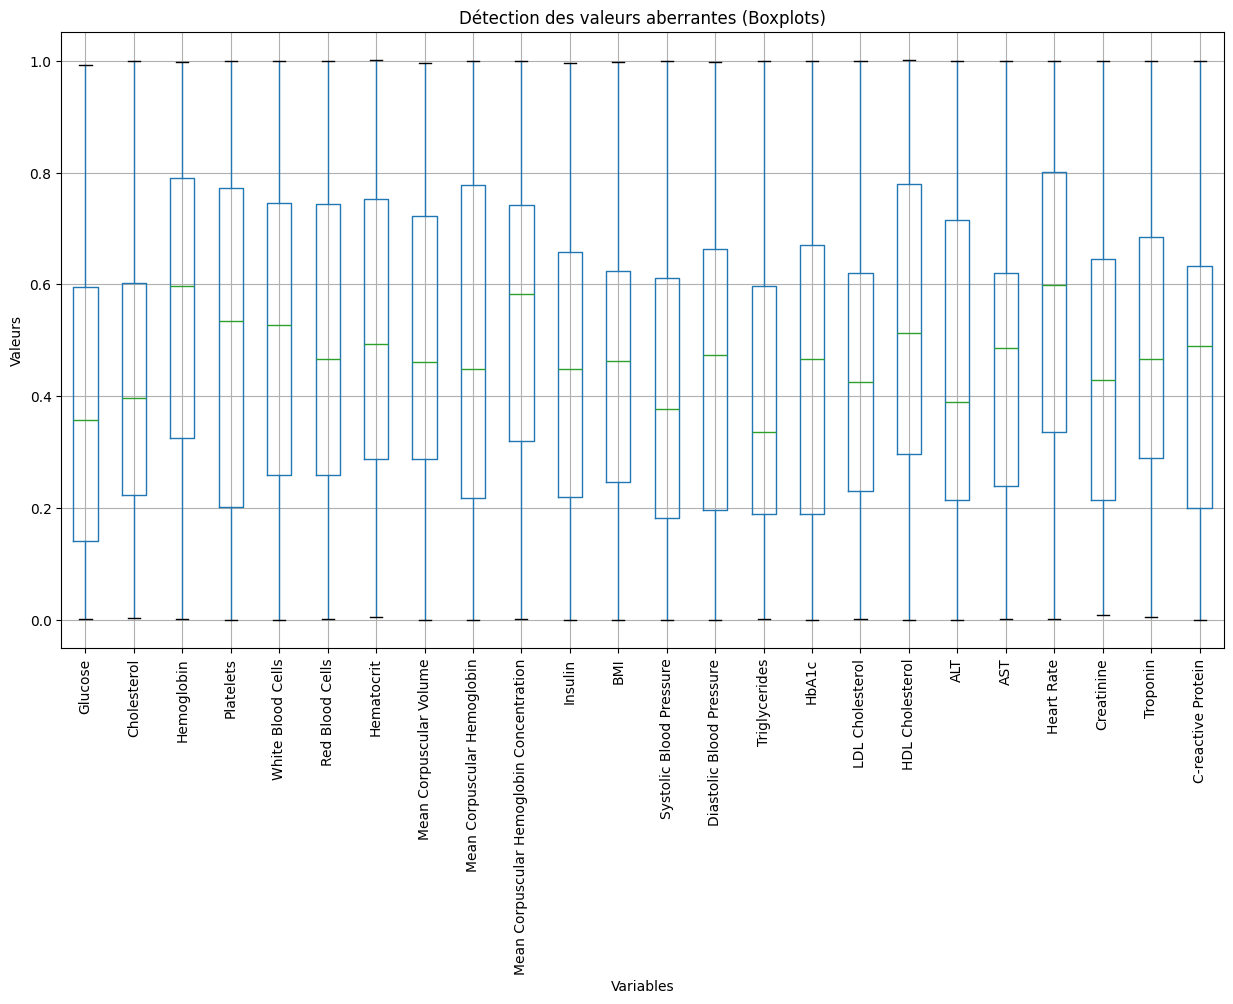

In [17]:
# V√©rification des valeurs aberantes
# Suppression de la colonne "Maladie" pour tracer uniquement les variables num√©riques
df_numeric = data.select_dtypes(include=["number"])

# Tracer les boxplots pour d√©tecter les valeurs aberrantes
plt.figure(figsize=(15, 8))
df_numeric.boxplot(rot=90)  # Rotation des labels pour lisibilit√©
plt.title("D√©tection des valeurs aberrantes (Boxplots)")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.show()

In [18]:
# V√©rifiction des doublons
df_novahealth.duplicated().sum()

2286

In [19]:
# Suppression des doublons
df_original_cleaned = df_novahealth.drop_duplicates()
print("Apr√®s suppression des doublons :",df_original_cleaned.duplicated().sum())

Apr√®s suppression des doublons : 0


In [20]:
# V√©rification de  la taille apr√®s suppression des doublons
print(f"Taille du dataset apr√®s suppression des doublons : {df_original_cleaned.shape[0]} lignes")

Taille du dataset apr√®s suppression des doublons : 551 lignes


In [21]:
from imblearn.over_sampling import SMOTE
# S√©paration X (variables m√©dicales) et Y (target = Disease)
X = df_original_cleaned.drop(columns=["Disease"])
Y = df_original_cleaned["Disease"]

# V√©rification la r√©partition avant SMOTE
print("\nR√©partition des maladies avant SMOTE :")
print(Y.value_counts())

# Appliquation SMOTE uniquement sur les classes trop faibles
smote = SMOTE(sampling_strategy={
    "Heart Di": 250,  # Augment√© mais pas trop
    "Thromboc": 200,
    "Thalasse": 200,
    "Healthy": 200,
    "Anemia": 200
}, random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X, Y)

# V√©rification de  la r√©partition apr√®s SMOTE
print("\nR√©partition des maladies apr√®s SMOTE :")
print(pd.Series(Y_resampled).value_counts())

# Reconstituer le dataset √©quilibr√©
df_balanced_fin = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced_fin["Disease"] = Y_resampled

# Sauvegarder le dataset final propre et √©quilibr√©
df_balanced_fin.to_csv("dataset_nova_final_corrected_end.csv", index=False)

print("‚úÖ Dataset final corrig√© apr√®s suppression des doublons et SMOTE bien appliqu√© !")


R√©partition des maladies avant SMOTE :
Disease
Diabetes    310
Anemia      100
Thalasse     62
Heart Di     39
Healthy      21
Thromboc     19
Name: count, dtype: int64

R√©partition des maladies apr√®s SMOTE :
Disease
Diabetes    310
Heart Di    250
Healthy     200
Thalasse    200
Anemia      200
Thromboc    200
Name: count, dtype: int64
‚úÖ Dataset final corrig√© apr√®s suppression des doublons et SMOTE bien appliqu√© !


---> Deux  diagrammes circulaires sont cr√©√©s pour comparer la r√©partition des maladies avant et apr√®s **iliminations des doublons et le Smothing.**

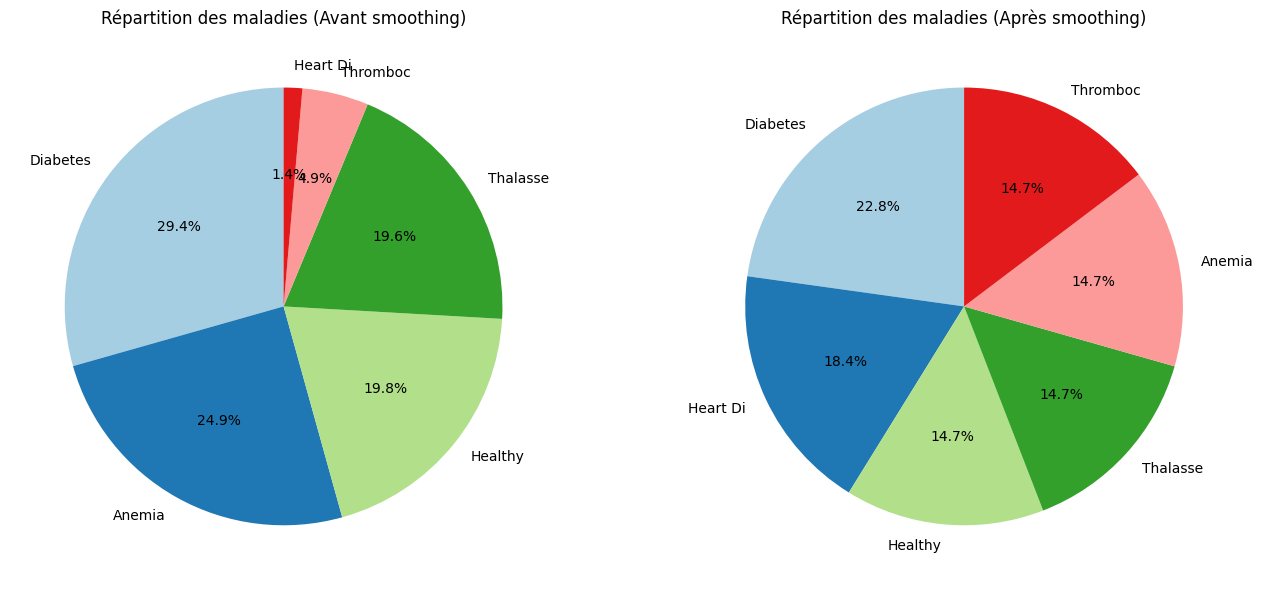

In [22]:
# Chargement des fichiers CSV avec les bons noms
df_before = pd.read_csv("dataset_nova.csv")  # Fichier avant smoothing
df_after = pd.read_csv("dataset_nova_final_corrected_end.csv")  # Fichier apr√®s smoothing

# Compter les occurrences des maladies
maladies_before = df_before["Disease"].value_counts()
maladies_after = df_after["Disease"].value_counts()

# Cr√©ation des sous-plots pour comparer les distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Diagramme circulaire avant smoothing
axes[0].pie(maladies_before, labels=maladies_before.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title("R√©partition des maladies (Avant smoothing)")

# Diagramme circulaire apr√®s smoothing
axes[1].pie(maladies_after, labels=maladies_after.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title("R√©partition des maladies (Apr√®s smoothing)")

# Affichage les graphiques
plt.tight_layout()
plt.show()

In [23]:
print(df_balanced_fin.head())

# V√©rifier la liste des colonnes
print("\nColonnes du dataset :", df_balanced_fin.columns)

# V√©rifier la taille du dataset
print(f"\nTaille du dataset : {df_balanced_fin.shape[0]} lignes, {df_balanced_fin.shape[1]} colonnes")

    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505

C‚Äôest une bonne taille pour un mod√®le IA de classification multi-maladies !
 Points Positifs :

    * SMOTE a √©t√© appliqu√© avec mod√©ration ‚Üí pas d'exc√®s de donn√©es artificielles.
    * Les doublons ont √©t√© supprim√©s AVANT SMOTE ‚Üí meilleure qualit√© des donn√©es.
    * Toutes les maladies ont suffisamment d'√©chantillons (~200 ou plus).
    * Toutes les colonnes m√©dicales sont pr√©sentes et bien normalis√©es.

In [24]:
print("\nValeurs minimales avant correction :")
print(df_balanced_fin.min())


Valeurs minimales avant correction :
Glucose                                      0.001827
Cholesterol                                  0.003088
Hemoglobin                                   0.000719
Platelets                                    0.000006
White Blood Cells                           -0.000206
Red Blood Cells                              0.000552
Hematocrit                                   0.004556
Mean Corpuscular Volume                      0.000309
Mean Corpuscular Hemoglobin                 -0.000614
Mean Corpuscular Hemoglobin Concentration    0.000719
Insulin                                     -0.000779
BMI                                          0.000051
Systolic Blood Pressure                     -0.000197
Diastolic Blood Pressure                     -0.00036
Triglycerides                                0.001885
HbA1c                                       -0.000991
LDL Cholesterol                              0.001036
HDL Cholesterol                             

In [25]:
num_cols = df_balanced_fin.select_dtypes(include=['number']).columns
df_balanced_fin[num_cols] = df_balanced_fin[num_cols].clip(lower=0)
print(" Toutes les valeurs n√©gatives ont √©t√© remplac√©es par 0.")

 Toutes les valeurs n√©gatives ont √©t√© remplac√©es par 0.



> Nous avons remplac√© les valeurs n√©gatives par 0 afin de garantir la coh√©rence des donn√©es. Certaines variables, comme la glyc√©mie, l'h√©moglobine ou le cholest√©rol, ne peuvent pas √™tre n√©gatives d'un point de vue physiologique. Ces valeurs n√©gatives r√©sultaient probablement d'erreurs de mesure ou de transformations incorrectes (normalisation, standardisation). Cette correction permet d'√©viter des incoh√©rences et d'assurer une meilleure qualit√© des donn√©es pour l'analyse et la mod√©lisation



In [26]:
print("\nValeurs minimales apr√®s correction :")
print(df_balanced_fin.min())


Valeurs minimales apr√®s correction :
Glucose                                      0.001827
Cholesterol                                  0.003088
Hemoglobin                                   0.000719
Platelets                                    0.000006
White Blood Cells                                 0.0
Red Blood Cells                              0.000552
Hematocrit                                   0.004556
Mean Corpuscular Volume                      0.000309
Mean Corpuscular Hemoglobin                       0.0
Mean Corpuscular Hemoglobin Concentration    0.000719
Insulin                                           0.0
BMI                                          0.000051
Systolic Blood Pressure                           0.0
Diastolic Blood Pressure                          0.0
Triglycerides                                0.001885
HbA1c                                             0.0
LDL Cholesterol                              0.001036
HDL Cholesterol                            

In [27]:
df_balanced_fin.to_csv("dataset_novaHealth.csv", index=False)
print("---------------------Dataset final pr√™t !---------------------")

---------------------Dataset final pr√™t !---------------------


In [28]:
from mtranslate import translate
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv("dataset_novaHealth.csv")

# Traduction des colonnes
df.columns = df.columns.map(lambda x: translate(x, 'fr', 'en'))

# Traduction de la derni√®re colonne
df[df.columns[-1]] = df[df.columns[-1]].apply(lambda x: translate(str(x), 'fr', 'en'))

# Sauvegarder le fichier CSV traduit
df.to_csv('maladies.csv', index=False)


**Chargement du nouvelle dataset**

In [29]:
df=pd.read_csv("maladies.csv")

**4. Analyse Exploratoire des Donn√©es (EDA)**

> L'objectif est de comprendre la distribution des variables, leurs relations et d√©tecter d'√©ventuels probl√®mes avant la mod√©lisation

In [30]:
# V√©rification des types de donn√©es
df.dtypes

Glucose                                              float64
Cholest√©rol                                          float64
H√©moglobine                                          float64
Plaquettes                                           float64
Globules blancs                                      float64
Globules rouges                                      float64
H√©matocrite                                          float64
Volume corpusculaire moyen                           float64
H√©moglobine corpusculaire moyenne                    float64
Concentration moyenne d'h√©moglobine corpusculaire    float64
Insuline                                             float64
IMC                                                  float64
Tension art√©rielle systolique                        float64
Tension art√©rielle diastolique                       float64
Triglyc√©rides                                        float64
HbA1c                                                float64
Cholest√©rol LDL                                      float64
Cholest√©rol HDL                                      float64
Alt                                                  float64
Ast                                                  float64
Rythme cardiaque                                     float64
Cr√©atinine                                           float64
Troponine                                            float64
Prot√©ine C-r√©active                                  float64
Maladie                                               object
dtype: object

**4.1 Distribution des variables**

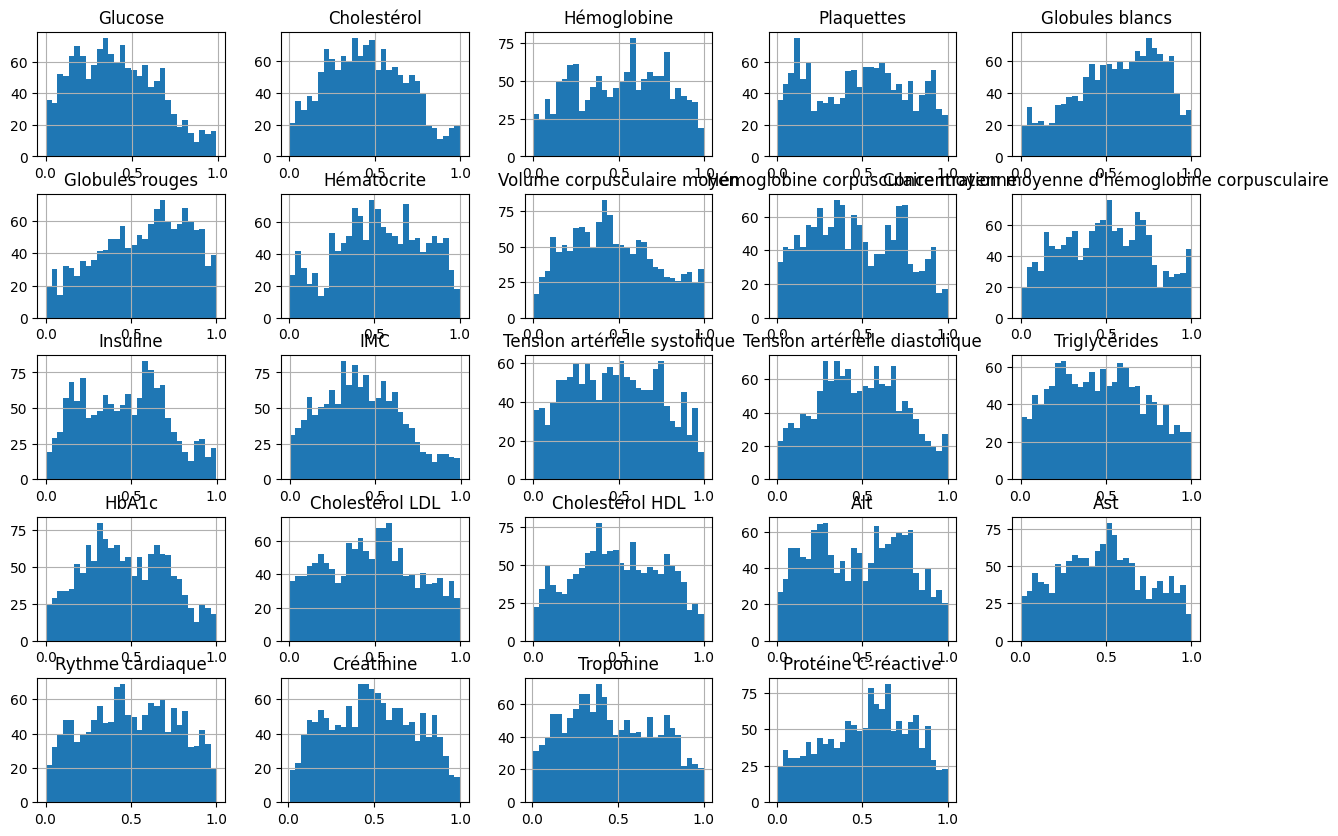

In [31]:
df.hist(figsize=(15, 10), bins=30)
plt.show()

**4.2 Visualisation de la distribution des classes**

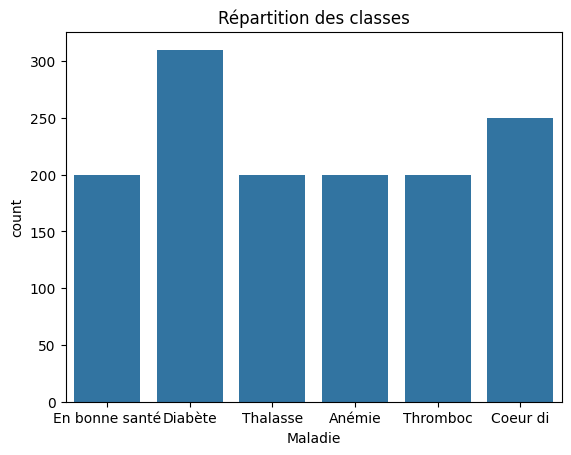

In [32]:
sns.countplot(x=df["Maladie"])
plt.title("R√©partition des classes")
plt.show()

**4.3 Affichage des statistiques descriptives**

In [33]:
# Statistiques g√©n√©rales
df.describe()

Glucose  Cholest√©rol  H√©moglobine   Plaquettes  Globules blancs  \
count  1360.000000  1360.000000  1360.000000  1360.000000      1360.000000   
mean      0.413329     0.455774     0.507790     0.485071         0.565048   
std       0.236516     0.233468     0.264865     0.281114         0.250904   
min       0.001827     0.003088     0.000719     0.000006         0.000000   
25%       0.220017     0.269503     0.265411     0.225728         0.389047   
50%       0.389212     0.446062     0.528362     0.500820         0.592738   
75%       0.585579     0.629373     0.731234     0.711886         0.769374   
max       0.991742     0.999606     0.997876     0.999507         0.999646   

       Globules rouges  H√©matocrite  Volume corpusculaire moyen  \
count      1360.000000  1360.000000                 1360.000000   
mean          0.563662     0.528418                    0.465387   
std           0.260298     0.253760                    0.252553   
min           0.000552     0.004556                    0.000309   
25%           0.367766     0.348208                    0.265062   
50%           0.599016     0.526220                    0.440266   
75%           0.782749     0.728623                    0.648680   
max           1.000000     1.000857                    0.996362   

       H√©moglobine corpusculaire moyenne  \
count                        1360.000000   
mean                            0.462678   
std                             0.262960   
min                             0.000000   
25%                             0.246728   
50%                             0.440498   
75%                             0.690753   
max                             0.999234   

       Concentration moyenne d'h√©moglobine corpusculaire  ...  Triglyc√©rides  \
count                                        1360.000000  ...    1360.000000   
mean                                            0.495141  ...       0.469233   
std                                             0.256469  ...       0.260234   
min                                             0.000719  ...       0.001885   
25%                                             0.288045  ...       0.248510   
50%                                             0.499981  ...       0.464287   
75%                                             0.693089  ...       0.669992   
max                                             0.999666  ...       0.999826   

             HbA1c  Cholest√©rol LDL  Cholest√©rol HDL          Alt  \
count  1360.000000      1360.000000      1360.000000  1360.000000   
mean      0.468767         0.480301         0.493040     0.481161   
std       0.243244         0.263060         0.255723     0.268390   
min       0.000000         0.001036         0.000000     0.000000   
25%       0.279733         0.264528         0.301995     0.246433   
50%       0.451040         0.485761         0.485106     0.483182   
75%       0.663354         0.672103         0.703954     0.709450   
max       0.999265         0.999567         1.000744     1.000326   

               Ast  Rythme cardiaque   Cr√©atinine    Troponine  \
count  1360.000000       1360.000000  1360.000000  1360.000000   
mean      0.485111          0.501294     0.489896     0.465684   
std       0.257811          0.261821     0.249734     0.259653   
min       0.002047          0.002145     0.008831     0.005714   
25%       0.287897          0.293304     0.285478     0.257776   
50%       0.487831          0.494267     0.489355     0.434229   
75%       0.669106          0.713945     0.686324     0.683527   
max       1.000402          0.999857     0.999348     1.000125   

       Prot√©ine C-r√©active  
count          1360.000000  
mean              0.522656  
std               0.255327  
min               0.000000  
25%               0.323138  
50%               0.550619  
75%               0.720780  
max               0.999488  

[8 rows x 24 columns]

**5. Pr√©traitement des Donn√©es**

In [34]:
df.dtypes

Glucose                                              float64
Cholest√©rol                                          float64
H√©moglobine                                          float64
Plaquettes                                           float64
Globules blancs                                      float64
Globules rouges                                      float64
H√©matocrite                                          float64
Volume corpusculaire moyen                           float64
H√©moglobine corpusculaire moyenne                    float64
Concentration moyenne d'h√©moglobine corpusculaire    float64
Insuline                                             float64
IMC                                                  float64
Tension art√©rielle systolique                        float64
Tension art√©rielle diastolique                       float64
Triglyc√©rides                                        float64
HbA1c                                                float64
Cholest√©rol LDL                                      float64
Cholest√©rol HDL                                      float64
Alt                                                  float64
Ast                                                  float64
Rythme cardiaque                                     float64
Cr√©atinine                                           float64
Troponine                                            float64
Prot√©ine C-r√©active                                  float64
Maladie                                               object
dtype: object

**Matrice de corr√©lation**

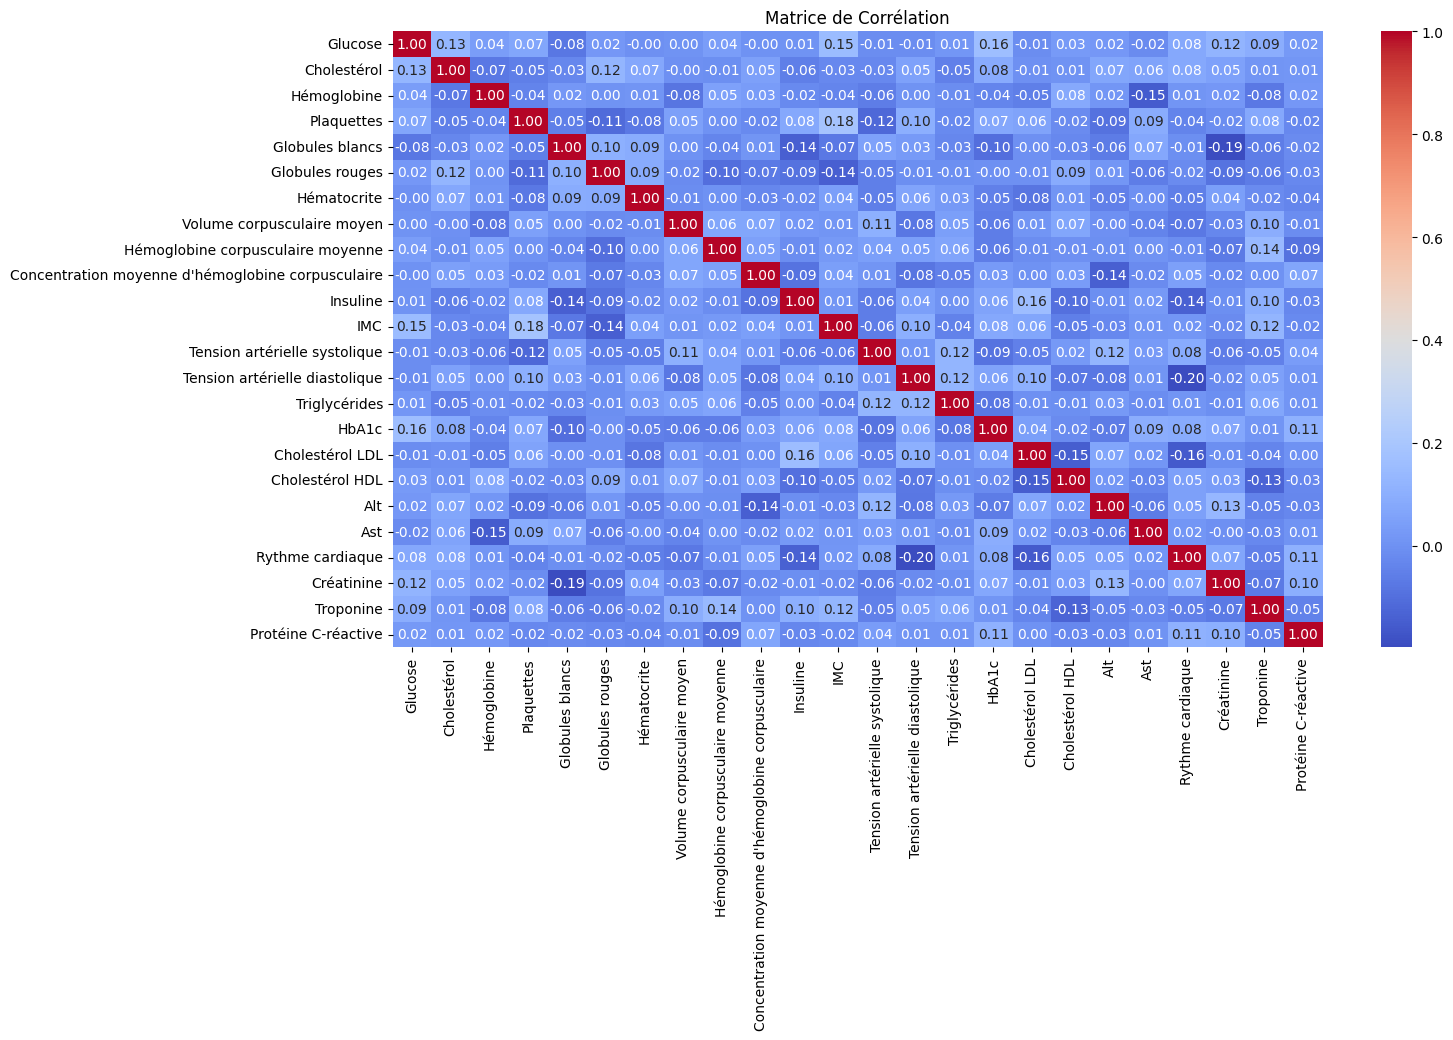

In [35]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corr√©lation")
plt.show()

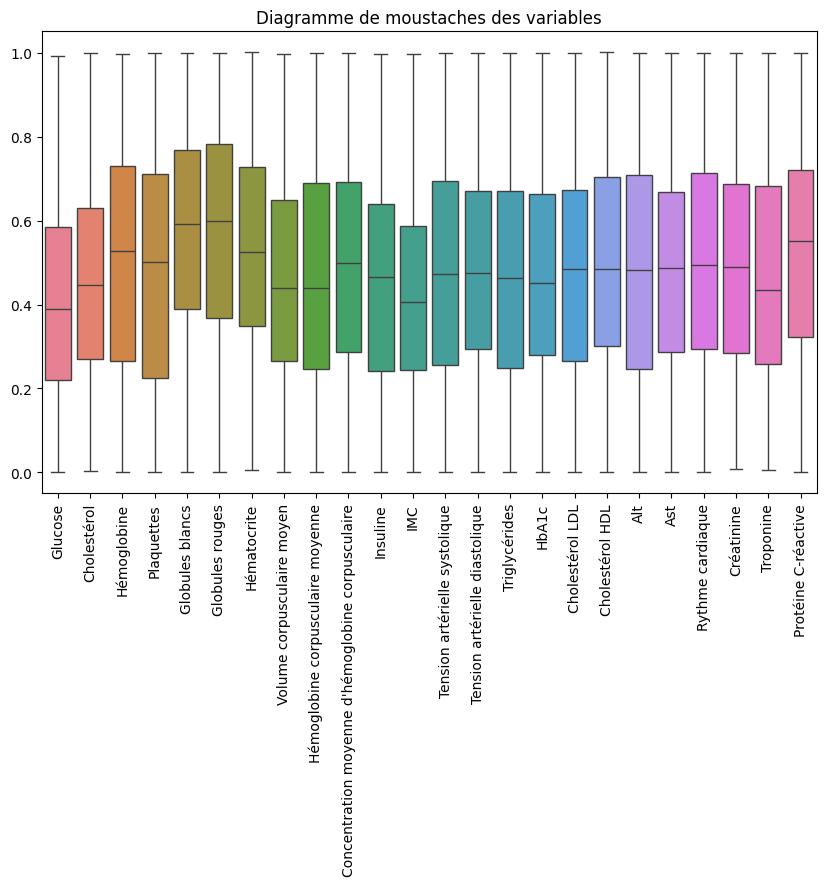

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagramme de moustache pour chaque colonne num√©rique (incluant "Maladie")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Diagramme de moustaches des variables")
plt.xticks(rotation=90)  # Pour une meilleure lisibilit√© des labels si n√©cessaire
plt.show()

**XGBoost**
---

In [37]:


# Afficher un aper√ßu du dataset
print(df.head())  # V√©rifier que le dataset est bien charg√©

import xgboost as xgb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("maladies.csv")

# Charger les donn√©es
features = df.columns[:-1]  #  S√©lection des 24 colonnes (supposons que la derni√®re colonne soit la cible)
X = df[features]
y = df["Maladie"]  #  Colonne cible

# Encoder les labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# S√©parer les donn√©es en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Entra√Æner le mod√®le XGBoost
model = xgb.XGBClassifier(
    n_estimators=300,  #  Nombre d'arbres (optimis√©)
    learning_rate=0.03,  #  Vitesse d‚Äôapprentissage plus fine
    max_depth=8,  #  Profondeur plus grande pour de meilleures performances
    subsample=0.8,  #  Sous-√©chantillonnage pour √©viter l'overfitting
    colsample_bytree=0.8,  #  S√©lection al√©atoire des features
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

model.fit(X_train, y_train)

# Enregistrer le mod√®le et l‚Äôencodeur dans un fichier
model_path = "models_file.pkl"  #  Sauvegarde locale
with open(model_path, "wb") as file:
    pickle.dump((model, label_encoder), file)

print(f"‚úÖ Mod√®le sauvegard√© sous : {model_path}")

    Glucose  Cholest√©rol  H√©moglobine  Plaquettes  Globules blancs  \
0  0.739597     0.650198     0.713631    0.868491         0.687433   
1  0.121786     0.023058     0.944893    0.905372         0.507711   
2  0.452539     0.116135     0.544560    0.400640         0.294538   
3  0.136609     0.015605     0.419957    0.191487         0.081168   
4  0.176737     0.752220     0.971779    0.785286         0.443880   

   Globules rouges  H√©matocrite  Volume corpusculaire moyen  \
0         0.529895     0.290006                    0.631045   
1         0.403033     0.164216                    0.307553   
2         0.382021     0.625267                    0.295122   
3         0.166214     0.073293                    0.668719   
4         0.439851     0.894991                    0.442159   

   H√©moglobine corpusculaire moyenne  \
0                           0.001328   
1                           0.207938   
2                           0.868369   
3                           0.125447

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:14:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


‚úÖ Mod√®le sauvegard√© sous : models_file.pkl


In [38]:
# Tester la pr√©cision sur l'ensemble de test
accuracy = model.score(X_test, y_test)
print(f"Pr√©cision du mod√®le sur l'ensemble de test : {accuracy:.2f}")

Pr√©cision du mod√®le sur l'ensemble de test : 0.99


In [39]:
# Pr√©dire les probabilit√©s sur l'ensemble de test
predictions_probabilities = model.predict_proba(X_test)

# Afficher les probabilit√©s de pr√©diction pour les premi√®res instances avec interpr√©tation
for i in range(5):  # Pour les 5 premi√®res instances
    print(f"Instance {i+1} :")
    for j, class_prob in enumerate(predictions_probabilities[i]):
        class_name = label_encoder.inverse_transform([j])[0]  # Obtenir le nom de la classe
        print(f"  - {class_name}: {class_prob:.2f} pour {class_name}")

Instance 1 :
  - An√©mie: 0.01 pour An√©mie
  - Coeur di: 0.01 pour Coeur di
  - Diab√®te: 0.03 pour Diab√®te
  - En bonne sant√©: 0.03 pour En bonne sant√©
  - Thalasse: 0.92 pour Thalasse
  - Thromboc: 0.01 pour Thromboc
Instance 2 :
  - An√©mie: 0.01 pour An√©mie
  - Coeur di: 0.00 pour Coeur di
  - Diab√®te: 0.00 pour Diab√®te
  - En bonne sant√©: 0.01 pour En bonne sant√©
  - Thalasse: 0.98 pour Thalasse
  - Thromboc: 0.00 pour Thromboc
Instance 3 :
  - An√©mie: 0.00 pour An√©mie
  - Coeur di: 0.00 pour Coeur di
  - Diab√®te: 0.00 pour Diab√®te
  - En bonne sant√©: 0.00 pour En bonne sant√©
  - Thalasse: 0.00 pour Thalasse
  - Thromboc: 0.99 pour Thromboc
Instance 4 :
  - An√©mie: 0.00 pour An√©mie
  - Coeur di: 0.00 pour Coeur di
  - Diab√®te: 1.00 pour Diab√®te
  - En bonne sant√©: 0.00 pour En bonne sant√©
  - Thalasse: 0.00 pour Thalasse
  - Thromboc: 0.00 pour Thromboc
Instance 5 :
  - An√©mie: 0.00 pour An√©mie
  - Coeur di: 0.00 pour Coeur di
  - Diab√®te: 0.00 pour Diab√®t

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import pickle
import numpy as np

# Charger les donn√©es
data = pd.read_csv('maladies.csv')

# S√©lectionner les features et la target
X = data.drop('Maladie', axis=1)
y = data['Maladie']

# Encoder la cible
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# S√©parer les donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Cr√©er et entra√Æner le mod√®le XGBoost sur toutes les caract√©ristiques pour √©valuer l'importance
initial_model = XGBClassifier(eval_metric='logloss')
initial_model.fit(X_train, y_train)

# √âvaluer l'importance des caract√©ristiques
importances = initial_model.feature_importances_

# Obtenir les indices des 9 caract√©ristiques les plus importantes
indices = np.argsort(importances)[-9:]  # Les 9 plus importantes

# S√©lectionner les 9 caract√©ristiques les plus importantes
X_train_important = X_train.iloc[:, indices]
X_test_important = X_test.iloc[:, indices]

# Afficher les noms des 9 caract√©ristiques importantes
important_features = X.columns[indices]
print("Les 9 caract√©ristiques les plus importantes :")
for feature in important_features:
    print(feature)

# Entra√Æner le mod√®le uniquement avec les caract√©ristiques s√©lectionn√©es
final_model = XGBClassifier(eval_metric='logloss')
final_model.fit(X_train_important, y_train)
# Enregistrer le mod√®le et l‚Äôencodeur dans un fichier
model_path = "models_manu.pkl"  # üîπ Sauvegarde locale
with open(model_path, "wb") as file:
    pickle.dump((initial_model, label_encoder), file)

print(f"‚úÖ Mod√®le sauvegard√© sous : {model_path}")

Les 9 caract√©ristiques les plus importantes :
Globules rouges
Volume corpusculaire moyen
Concentration moyenne d'h√©moglobine corpusculaire
H√©matocrite
Glucose
Cholest√©rol
IMC
Insuline
Plaquettes
‚úÖ Mod√®le sauvegard√© sous : models_manu.pkl


In [ ]:
# Pr√©dire les probabilit√©s sur l'ensemble de test
predictions_probabilities = final_model.predict_proba(X_test_important)

# Afficher les probabilit√©s de pr√©diction pour les premi√®res instances avec interpr√©tation
for i in range(5):  # Pour les 5 premi√®res instances
    print(f"Instance {i+1} :")
    for j, class_prob in enumerate(predictions_probabilities[i]):
        class_name = label_encoder.inverse_transform([j])[0]  # Obtenir le nom de la classe
        print(f"  - {class_name}: {class_prob:.2f} pour {class_name}")

**Random Forest**
---

In [43]:
from sklearn.model_selection import cross_val_score

df = pd.read_csv('maladies.csv')

# Encoder la variable cible
label_encoder = LabelEncoder()
df["Maladie"] = label_encoder.fit_transform(df["Maladie"])

# S√©parer les caract√©ristiques et la cible
X = df.drop(columns=["Maladie"])
y = df["Maladie"]

# Diviser les donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialiser le mod√®le Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Validation crois√©e
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Entra√Æner le mod√®le sur l'ensemble d'entra√Ænement
rf_model.fit(X_train, y_train)

# Faire des pr√©dictions
y_pred = rf_model.predict(X_test)

# Rapport de classification
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Afficher le rapport sous forme de DataFrame
classification_df = pd.DataFrame(classification_rep).transpose()
from IPython.display import display
display(classification_df)

precision    recall  f1-score     support
An√©mie           0.948718  0.925000  0.936709   40.000000
Coeur di         0.980000  0.980000  0.980000   50.000000
Diab√®te          0.937500  0.967742  0.952381   62.000000
En bonne sant√©   1.000000  1.000000  1.000000   40.000000
Thalasse         1.000000  0.975000  0.987342   40.000000
Thromboc         1.000000  1.000000  1.000000   40.000000
accuracy         0.974265  0.974265  0.974265    0.974265
macro avg        0.977703  0.974624  0.976072  272.000000
weighted avg     0.974536  0.974265  0.974300  272.000000

**ANN**
---

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les donn√©es
data = pd.read_csv('maladies.csv')  # Remplacez par votre dataset

# S√©paration des features et de la cible (target)
X = data.drop(columns=['Maladie'])  # Remplacez 'Maladie' par le vrai nom de votre colonne cible
y = data['Maladie']

# Encodage One-Hot de la cible
ohe = LabelBinarizer()
y_encoded = ohe.fit_transform(y)

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# S√©parer en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Construction du mod√®le ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')  # Multiclass output
])

# Compilation du mod√®le
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entra√Ænement du mod√®le
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Sauvegarde du mod√®le
model.save('ann_multiclass_model.h5')


# Pr√©dictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Rapport de classification
print(classification_report(y_test_classes, y_pred_classes, target_names=ohe.classes_))

# Score AUC
auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f'AUC Score: {auc_score:.4f}')